# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [39]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [40]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



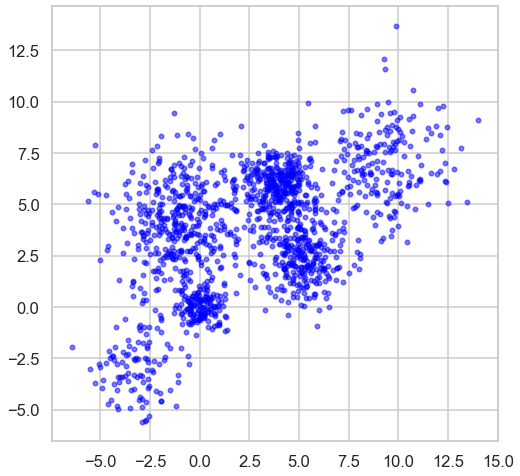

In [41]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)


### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

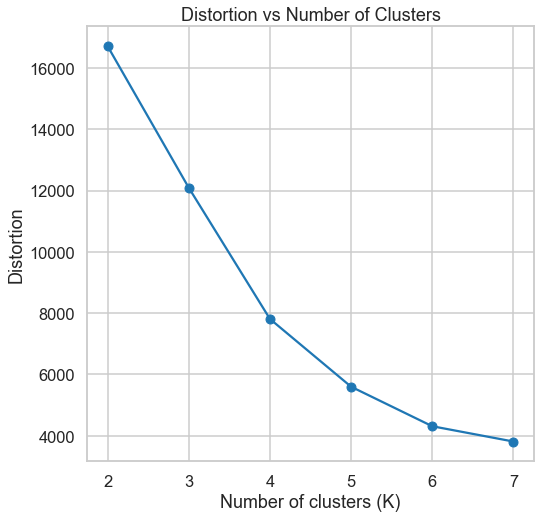

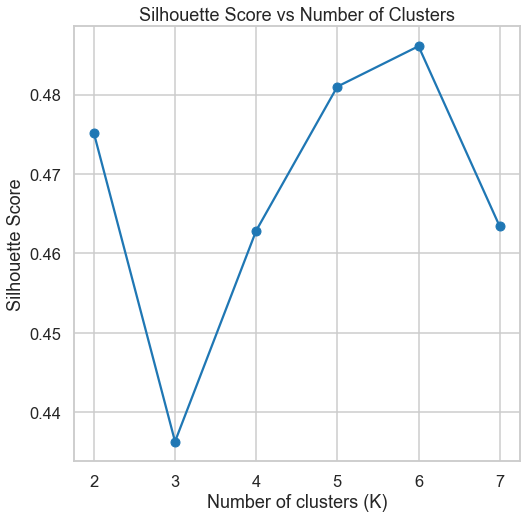

Text(0.5, 1.0, 'K')

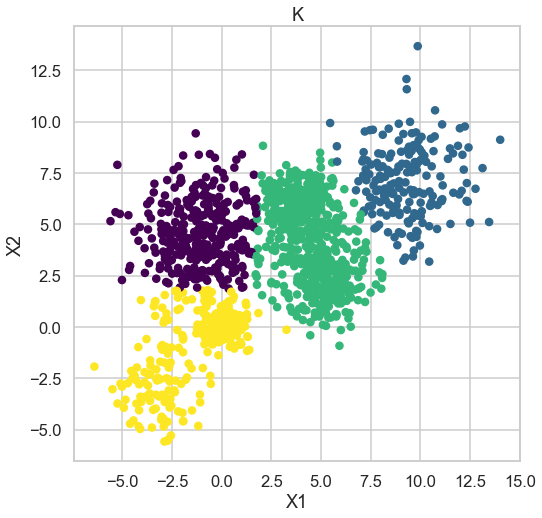

In [70]:
# KMeans clustering with different values of K
distortions = []
sil_scores = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Multi_blob_Data)
    distortions.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(Multi_blob_Data, kmeans.labels_))

# Plot distortion function versus K
plt.plot(range(2, 8), distortions, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')
plt.title('Distortion vs Number of Clusters')
plt.show()

#The elbow in the plot is not very clear, but we can see that the rate of decrease in distortion slows down after K=3 or K=4. 

# Plot silhouette_score versus K
plt.plot(range(2, 8), sil_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

# KMeans clustering with K=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(Multi_blob_Data)
labels = kmeans.predict(Multi_blob_Data)

# Display outcome of KMeans with K=4
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels, s=50, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K')



### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

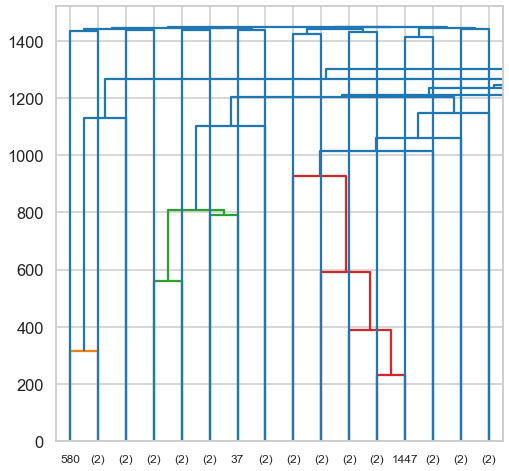

Affinity: euclidean, Linkage: average, Distance Threshold: None, Silhouette Score: 0.4490582469502603


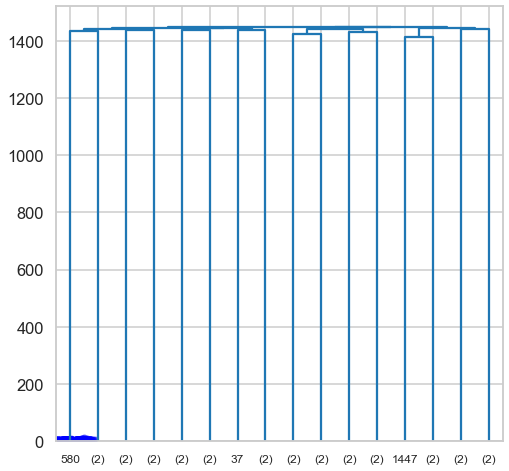

Affinity: euclidean, Linkage: average, Distance Threshold: 2.5, Silhouette Score: 0.30335263855926


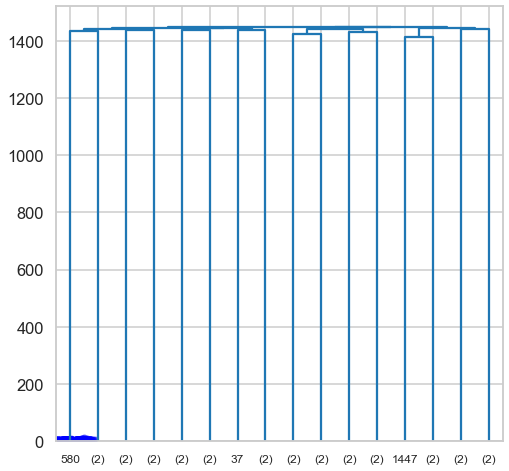

Affinity: euclidean, Linkage: average, Distance Threshold: 4.5, Silhouette Score: 0.433187948807373


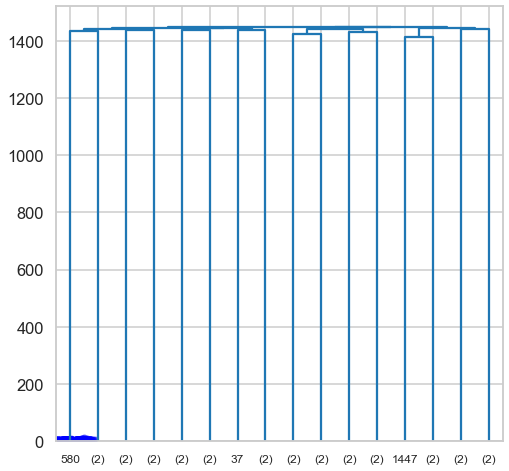

Affinity: euclidean, Linkage: average, Distance Threshold: 6.5, Silhouette Score: 0.4716908069861964


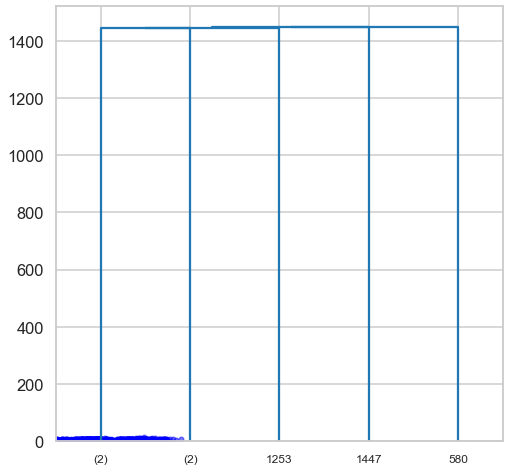

Affinity: euclidean, Linkage: single, Distance Threshold: None, Silhouette Score: 0.2074012584493559


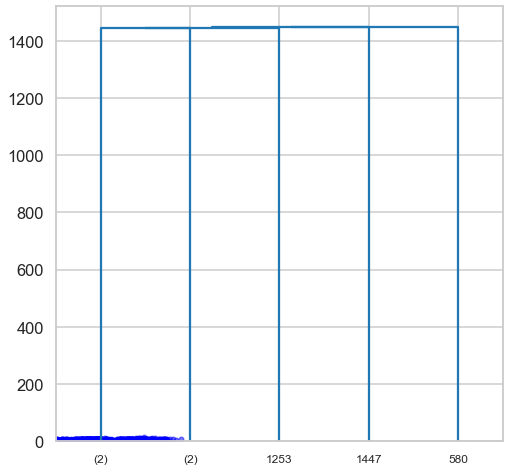

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [67]:
def display_dendrogram(model, **kwargs):
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting purposes
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.zeros(children.shape[0])
    for i, merge in enumerate(children):
        no_of_observations[i] = len(np.unique(merge))

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

display_dendrogram(model)
# Agglomerative Clustering with different parameters
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']
distance_thresholds = [None, 2.5, 4.5, 6.5]

best_params = {}
best_score = -1

for aff in affinities:
    for link in linkages:
        for dist in distance_thresholds:
            if dist is not None:
                model = AgglomerativeClustering(n_clusters=None, affinity=aff, linkage=link, distance_threshold=dist)
            else:
                model = AgglomerativeClustering(n_clusters=4, affinity=aff, linkage=link)

            model.fit(Multi_blob_Data)
            labels = model.labels_
            dendro_kwargs = {'truncate_mode': 'level', 'p': 3}
            display_dendrogram(model, **dendro_kwargs)
            plt.show()
            score = silhouette_score(Multi_blob_Data, labels)

            print(f"Affinity: {aff}, Linkage: {link}, Distance Threshold: {dist}, Silhouette Score: {score}")
            display_cluster(Multi_blob_Data, labels)

            if score > best_score:
                best_score = score
                best_params = {'aff'}


# DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

EPS: 0.10, Min Samples: 5, Silhouette Score: -0.5423348432605972
EPS: 0.10, Min Samples: 6, Silhouette Score: -0.5008065260955386
EPS: 0.20, Min Samples: 5, Silhouette Score: -0.3999643249301035
EPS: 0.20, Min Samples: 6, Silhouette Score: -0.4180866874540623
EPS: 0.20, Min Samples: 7, Silhouette Score: -0.48893307519972995
EPS: 0.20, Min Samples: 8, Silhouette Score: -0.44633773926928655
EPS: 0.20, Min Samples: 9, Silhouette Score: -0.44848274895257567
EPS: 0.20, Min Samples: 10, Silhouette Score: -0.4342356562032568
EPS: 0.20, Min Samples: 11, Silhouette Score: -0.44713367908702734
EPS: 0.20, Min Samples: 12, Silhouette Score: -0.4406511275226322
EPS: 0.20, Min Samples: 13, Silhouette Score: -0.44353913688654695
EPS: 0.30, Min Samples: 5, Silhouette Score: -0.13789448202067064
EPS: 0.30, Min Samples: 6, Silhouette Score: -0.20223775012035436
EPS: 0.30, Min Samples: 7, Silhouette Score: -0.2902367412414653
EPS: 0.30, Min Samples: 8, Silhouette Score: -0.2657304635784329
EPS: 0.30, Min

EPS: 0.80, Min Samples: 19, Silhouette Score: 0.14829099419497185
EPS: 0.80, Min Samples: 20, Silhouette Score: 0.14471454153150148
EPS: 0.80, Min Samples: 21, Silhouette Score: 0.04706798390732836
EPS: 0.80, Min Samples: 22, Silhouette Score: 0.19823769935850546
EPS: 0.80, Min Samples: 23, Silhouette Score: 0.19591110367773315
EPS: 0.80, Min Samples: 24, Silhouette Score: 0.17173076378409832
EPS: 0.80, Min Samples: 25, Silhouette Score: 0.1642081628920046
EPS: 0.90, Min Samples: 10, Silhouette Score: 0.2838246909051453
EPS: 0.90, Min Samples: 11, Silhouette Score: 0.27500697491680326
EPS: 0.90, Min Samples: 12, Silhouette Score: 0.2758148639123136
EPS: 0.90, Min Samples: 13, Silhouette Score: 0.27969512008169545
EPS: 0.90, Min Samples: 14, Silhouette Score: 0.24632705465466545
EPS: 0.90, Min Samples: 15, Silhouette Score: 0.24177930982747645
EPS: 0.90, Min Samples: 16, Silhouette Score: 0.22200604654982506
EPS: 0.90, Min Samples: 17, Silhouette Score: 0.21938332895252396
EPS: 0.90, Mi

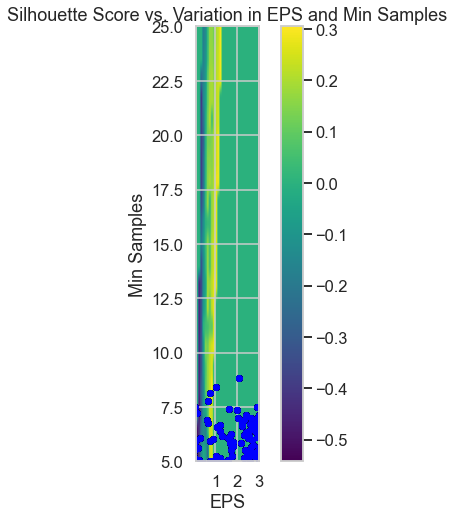

In [60]:
# DBSCAN with different parameters
eps_values = np.linspace(0.1, 3, 30)
min_samples_values = np.arange(5, 26)

best_params = {}
best_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        model1 = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model1.fit_predict(Multi_blob_Data)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters > 1:
            score = silhouette_score(Multi_blob_Data, labels)
            print(f"EPS: {eps:.2f}, Min Samples: {min_samples}, Silhouette Score: {score}")
            display_cluster(Multi_blob_Data, labels)

            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}
                
scores = np.zeros((len(eps_values), len(min_samples_values)))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        model1 = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model1.fit_predict(Multi_blob_Data)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters > 1:
            score = silhouette_score(Multi_blob_Data, labels)
            scores[i, j] = score

plt.imshow(scores.T, origin='lower', cmap='viridis', extent=[eps_values[0], eps_values[-1], min_samples_values[0], min_samples_values[-1]])
plt.colorbar()
plt.xlabel('EPS')
plt.ylabel('Min Samples')
plt.title('Silhouette Score vs. Variation in EPS and Min Samples')
plt.show()



### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

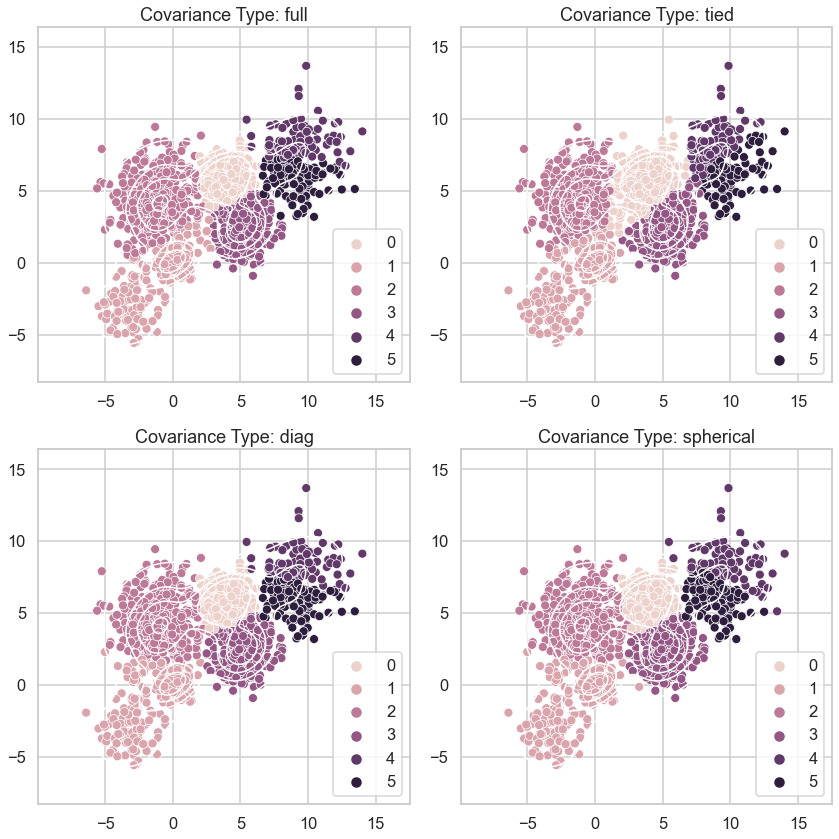

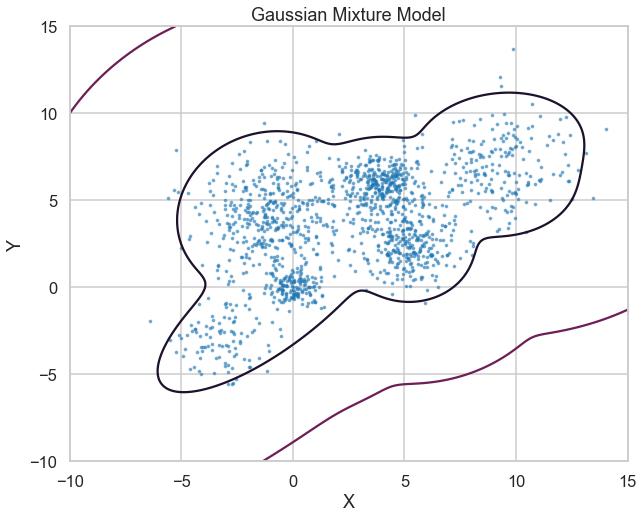

In [38]:
# Define number of clusters
n_clusters = 6

# Define covariance types to try
covariance_types = ['full', 'tied', 'diag', 'spherical']

# Fit and plot GMM for each covariance type
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()
for i, cov_type in enumerate(covariance_types):
    gmm = GaussianMixture(n_components=n_clusters, covariance_type=cov_type, random_state=42)
    gmm.fit(Multi_blob_Data)
    labels = gmm.predict(Multi_blob_Data)
    sns.scatterplot(x=Multi_blob_Data[:,0], y=Multi_blob_Data[:,1], hue=labels, ax=axes[i])
    sns.kdeplot(x=Multi_blob_Data[:,0], y=Multi_blob_Data[:,1], levels=5, color='w', linewidths=1.5, ax=axes[i])
    axes[i].set_title('Covariance Type: {}'.format(cov_type))
plt.tight_layout()
plt.show()

# Fit GMM with the best covariance type
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
gmm.fit(Multi_blob_Data)

# Define the x and y ranges for the contour plot
x_range = np.linspace(-10, 15, 500)
y_range = np.linspace(-10, 15, 500)
X, Y = np.meshgrid(x_range, y_range)
Z = -gmm.score_samples(np.array([X.ravel(), Y.ravel()]).T)
Z = Z.reshape(X.shape)

# Plot the resulting distribution
plt.figure(figsize=(10, 8))
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], s=5, alpha=0.5)
plt.contour(X, Y, Z, levels=np.logspace(-3, 2, 10))
plt.title('Gaussian Mixture Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 